# Applications of Bootstrapping

- toc: true
- branch: master
- badges: true
- comments: true
- author: Ziyin Li
- categories: [jupyter]

## Introduction to Bootstrapping

**Bootstrapping** is a ubiquitous technique in applied statistics which allows us to produce confidence intervals for all kinds of estimators we might want to use but which might be analytically intractable.

Suppose that we have a sample of data denoted by $y_1,...,y_n$. The sample values are thought of as the outcomes of independent and identically distributed random variables $Y_1,...,Y_n$ whose probability density function (PDF) and cumulative distribution function (CDF) we shall denote by f and F, respectively. The sample is to be used to make inferences about a population characteristic, generically denoted by $\theta$, using a statistic T whose value in the sample is t. We assume for the moment that the choice of T has been made and that it is an estimate for $\theta$.

So how to calculate the confidence limits for $\theta$ using T?

There are two situations to distinguish, the *parametric and the nonparametric*. 

- When there is a particular mathematical model, with adjustable constants or parameters that fully determine f, such a model is called parametric and statistical methods based on this model are parametric methods. 

- When we have no parametric model, but that it is sensible to assume that $Y_1,...,Y_n$ are independent and identically distributed according to an unknown distribution function F. We use the EDF $\hat{F}$ to estimate the unknown CDF F.    
To apply simulation with the EDF is very straightforward. Because the EDF puts equal probabilities on the original data values $y_1,...,y_n$, each $Y^*$ is independently sampled at random from those data values. Therefore the simulated sample $Y_1^*,...,Y_n^*$ is a random sample taken *with replacement* from the data. This resampling procedure is called *nonparametric bootstrapping*.

*Note: Even if there is a plausible parametric model, a nonparametric analysis can still be useful to assess the robustness of conclusions drawn from a parametric analysis.*

## An Application of Bootstrapping: the City Population Example

We have some data below for the application of bootstrapping.

In [9]:
#hide
using Pkg; Pkg.instantiate()

  Installed ArrayLayouts ─── v0.4.7
  Installed ChainRules ───── v0.7.18
  Installed ChainRulesCore ─ v0.9.9


In [2]:
#hide
using Plots,Distributions,StatsPlots

Table 1 reports n=49 data pairs, each corresponding to a US city, the pair being the 1920 and 1930 populations of the city, which we denote by u and x. The data are plotted in Figure 1. Interest here is in the ratio of means, because this would enable us to estimate the total population of the US in 1930 from the 1920 figure. If the cities form a random sample with $(U,X)$ denoting the pair of population values
for a randomly selected city, then the total 1930 population is the product of the total 1920 population and the ratio of expectations $\theta=E(X)/E(U)$. This ratio is the parameter of interest.

In this case there is no obvious parametric model for the joint distribution of $(U,X)$, so it is natural to estimate $\theta$ by its empirical analog, $T=\bar{X}/\bar{U}$, the ratio of sample averages. We are then concerned with the uncertainty in T. If we had a plausible parametric model - for example, that the pair $(U,X)$ has a bivariate normal distribution - then theoretical calculations would lead to bias and variance estimates for use in a normal approximation, which in turn would provide approximate confidence intervals for $\theta$. Without such a model we must use nonparametric analysis. It is still possible to estimate the bias and variance of T, and this makes normal approximation still feasible, as well as approaches to setting confidence intervals.

In [3]:
#hide
u=[138,93,61,179,48,37,29,23,30,2,38,46,71,25,298,74,50,76,381,387,78,60,507,50,77,64,40,136,243,256,94,36,45,67,120,172,66,46,121,44,64,56,40,116,87,43,43,161,36]
x=[143,104,69,260,75,63,50,48,111,50,52,53,79,57,317,93,58,80,464,459,106,57,634,64,89,77,60,139,291,288,85,46,53,67,115,183,86,65,113,58,63,142,64,130,105,61,50,232,54]

49-element Array{Int64,1}:
 143
 104
  69
 260
  75
  63
  50
  48
 111
  50
  52
  53
  79
   ⋮
  65
 113
  58
  63
 142
  64
 130
 105
  61
  50
 232
  54

![](tables/table1.jpg)

**Table 1** Populations in thousands of n=49 large United States cities in 1920 (u) and 1930 (x) (Cochran, 1977, p. 152)

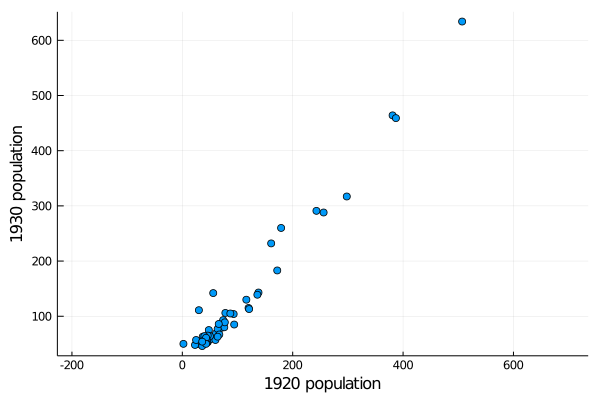

In [3]:
#hide_input
scatter(u,x,
    xlabel="1920 population",
    ylabel="1930 population",
    legend=false,
    ratio=1)

**Figure 1** Populations of 49 large United States cities (in 1000s) in 1920 and 1930

The plug-in estimator $\hat{\theta}$, namely T, is:

In [4]:
T=mean(x)/mean(u)

1.2390185991294025

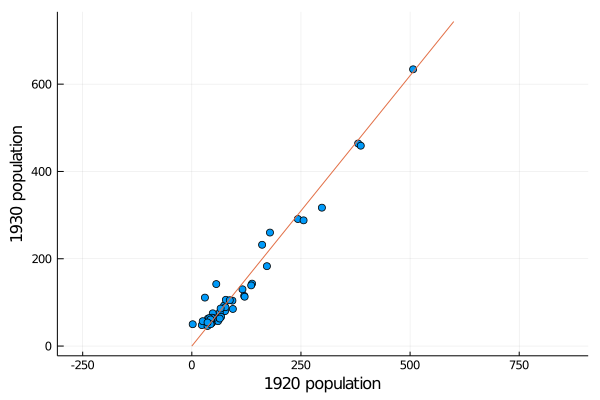

In [5]:
#hide_input
plot!([0,600],x->T*x)

The resampling process can be realized easily through coding:

In [5]:
boot_estimates=[mean(sample(x,length(x))/mean(sample(u,length(u)))) for _ in 1:10^5]

100000-element Array{Float64,1}:
 1.2320344625024477
 1.0258012497480349
 1.3205824820691157
 1.2472506636329166
 1.283705231576974
 1.655948553054662
 1.0341543513957308
 1.3604694485842028
 1.0114255580945684
 1.368379910103576
 1.2946481082140755
 1.1922160444797463
 1.218289085545723
 ⋮
 1.3185451638689052
 1.1254292062209654
 0.890833075255497
 1.2765135251180764
 0.9283658458586506
 1.1773759138130047
 0.836320191158901
 1.0277264325323476
 0.9891087311671807
 0.9452332657200813
 1.3403908794788275
 1.0395830185828676

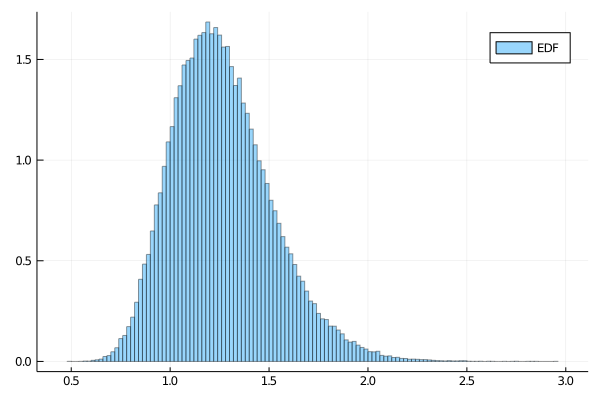

In [6]:
histogram(boot_estimates,normalized=true,opacity=0.4,label="EDF")

We can then estimate the standard error of T:

In [7]:
d=std(boot_estimates)

0.2529612060145959

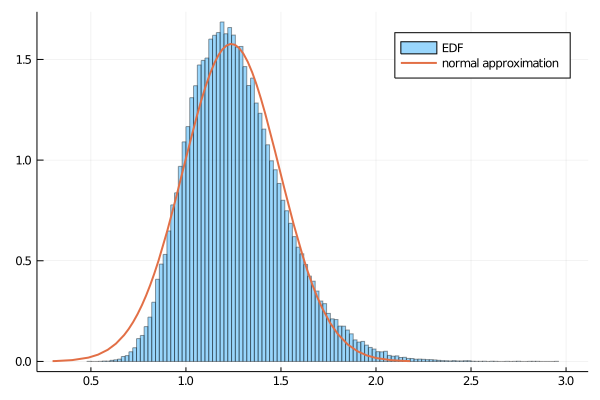

In [8]:
plot!(Normal(T,d),lw=2,label="normal approximation")

From the plot above, we can tell that the distribution is similar to the normal distribution with mean T and standard deviation d. So the normal distribution is a plausible model to choose for parametric analysis.

Then we are able to get the confidence interval at the 95% confidence level:

In [9]:
CI_1=(T-1.96*d,T+1.96*d)

(0.7432146353407946, 1.7348225629180103)

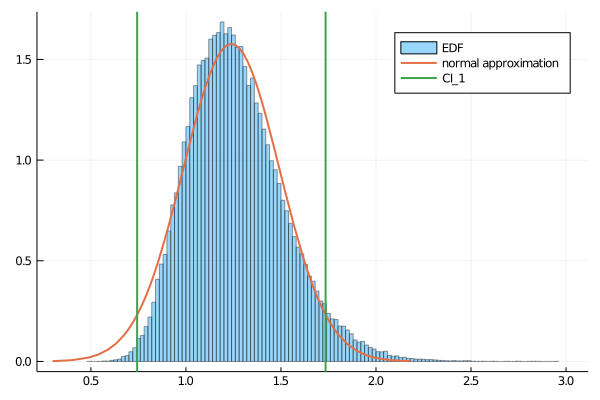

In [10]:
vline!([CI_1[1],CI_1[2]],lw=2,label="CI_1")

To come up with confidence intervals, we might not always want to approximate the standard error of the original statistical functional and use a normal approximation.

Since we're going to be approximating the whole distribution of our estimator, we can estimate quantiles directly (nonparametrically).

In [11]:
CI_2=quantile(boot_estimates,(0.025,0.975))

(0.8467548519006242, 1.834563390021735)

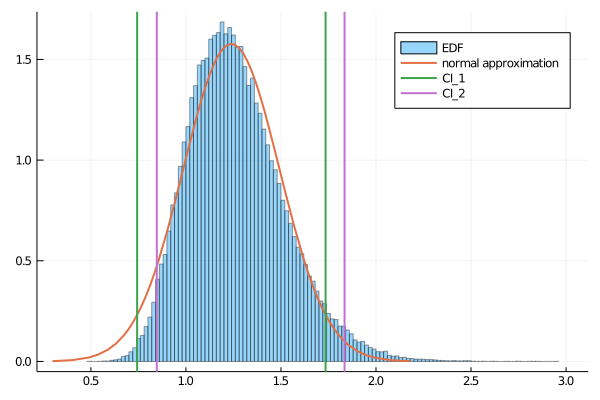

In [12]:
vline!([CI_2[1],CI_2[2]],lw=2,label="CI_2")

We get slightly different results if we use bootstrap quantile estimates (*nonparametric*) instead of estimating the standard error and using the normal approximation (*parametric*). This makes sense, because the distribution is not very close to normal. If the distribution is quite far from normal, the quantile estimate is quite reasonable, while the standard error calculation will be less reliable.

## Discussions

Whereas nonparametric bootstraps make no assumptions about how the observations are distributed, and resample the original sample, parametric bootstraps resample a known distribution function, whose parameters are estimated from our sample.

These bootstrap estimates are either used to attach confidence limits nonparametrically - or a second parametric model is fitted using parameters estimated from the distribution of the bootstrap estimates, from which confidence limits are obtained analytically.

The **advantages and disadvantages** of *parametric bootstrapping* and *nonparametric bootstrapping* can be summarised as follows:

- In the nonparametric bootstrap, samples are drawn from a discrete set of n observations. This can be a serious disadvantage in small sample sizes because spurious fine structure in the original sample, but absent from the population sampled, may be faithfully reproduced in the simulated data.   
Another concern is that because small samples have only a few values, covering a restricted range, nonparametric bootstrap samples underestimate the amount of variation in the population we originally sampled. As a result, statisticians generally see samples of 10 or less as too small for reliable nonparametric bootstrapping.    
Small samples convey little reliable information about the higher moments of their population distribution function - in which case, a relatively simple function may be adequate.

- Although parametric bootstrapping provides more power than the nonparametric bootstrap, it does so on the basis of an inherently arbitrary choice of model. Whilst the cumulative distribution of even quite small samples deviate little from that of their population, it can be far from easy to select the most appropriate mathematical function a priori.        
So although parametric bootstrapping can be relatively straightforward to perform, and may be used to construct confidence intervals for the sample median of small samples, the bootstrap and estimator distribution functions are often very different.

## Sources/Citations

[1] Davison, A., & Hinkley, D. (1997). Bootstrap Methods and their Application (Cambridge Series in Statistical and Probabilistic Mathematics). Cambridge: Cambridge University Press. doi:10.1017/CBO9780511802843

[2] https://influentialpoints.com/Training/nonparametric-or-parametric_bootstrap.htm